Dataset loaded successfully!
Shape: (200, 5)


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Columns: ['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
Cleaned data shape: (200, 4)


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


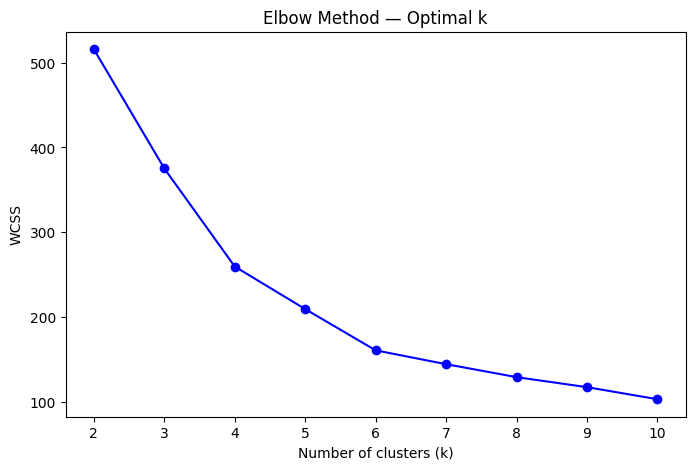

Cluster distribution:
Cluster
0    60
2    59
1    41
3    40
Name: count, dtype: int64


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


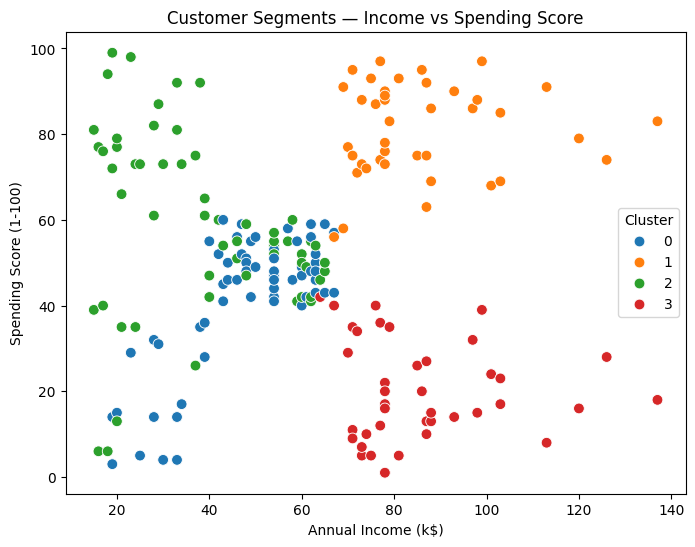

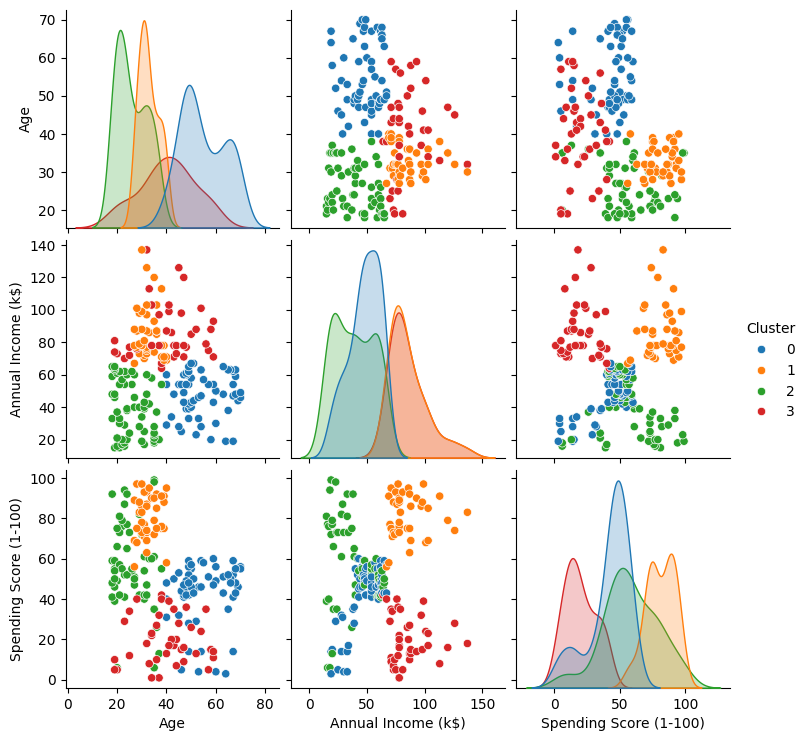

Cluster summary statistics:


Age         Annual Income (k$)          Spending Score (1-100)  \
              mean min max               mean min  max                   mean   
Cluster                                                                         
0        54.766667  40  70          47.933333  19   67              41.783333   
1        32.731707  27  40          85.634146  67  137              80.902439   
2        25.949153  18  38          38.779661  15   65              58.067797   
3        40.275000  19  59          85.925000  64  137              19.750000   

                 
        min max  
Cluster          
0         3  60  
1        56  97  
2         6  99  
3         1  42

Clustered data saved to customer_segmentation_result.csv


In [2]:
# Install dependencies
!pip install pandas numpy scikit-learn matplotlib seaborn --quiet

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# --- Step 1: Load dataset from a working public URL ---
dataset_url = "https://gist.githubusercontent.com/GaneshSparkz/9dabfdeab9808d8e1b74f7fad4b91253/raw/Mall_Customers.csv"
df = pd.read_csv(dataset_url)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
display(df.head())
print("Columns:", df.columns.tolist())

# --- Data cleaning & preprocessing ---
df = df.dropna(subset=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], how='any')

# Drop non-numeric columns (like Gender, CustomerID) before clustering
df_clean = df.copy()
for col in df_clean.columns:
    if df_clean[col].dtype == 'object':
        df_clean = df_clean.drop(columns=[col])

print("Cleaned data shape:", df_clean.shape)
display(df_clean.describe())

# --- Feature scaling ---
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean)

# --- Determine optimal number of clusters (Elbow method) ---
wcss = []
K_RANGE = range(2, 11)
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(scaled_features)
    wcss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(list(K_RANGE), wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method — Optimal k')
plt.show()

# Choose optimal k (e.g. 4)
optimal_k = 4

# --- Apply K-Means clustering ---
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_features)
df['Cluster'] = cluster_labels

print("Cluster distribution:")
print(df['Cluster'].value_counts())
display(df.head())

# --- Visualize clusters (Annual Income vs Spending Score) ---
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    s=60
)
plt.title('Customer Segments — Income vs Spending Score')
plt.show()

# --- Pairplot for Age, Income, Spending Score by Cluster ---
sns.pairplot(
    df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']],
    hue='Cluster',
    palette='tab10',
    diag_kind='kde'
)
plt.show()

# --- Cluster summary statistics for interpretation ---
cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean','min','max'],
    'Annual Income (k$)': ['mean','min','max'],
    'Spending Score (1-100)': ['mean','min','max']
})
print("Cluster summary statistics:")
display(cluster_summary)

# --- Save clustered result ---
df.to_csv('customer_segmentation_result.csv', index=False)
print("Clustered data saved to customer_segmentation_result.csv")